In [1]:
import shap
import pickle
import pandas as pd

In [2]:
with open("S01_shap_calc.pkl", "rb") as f:
    data = pickle.load(f)
    shaps = data["shaps"]
    infos = data["infos"]

In [3]:
pd.DataFrame.from_dict(infos)

,model,model_params,test_size,random_state
0,DTR,"{'criterion': 'friedman_mse', 'splitter': 'bes...",0.3,1
1,EN,"{'alpha': 0.06036600023843763, 'l1_ratio': 0.5...",0.3,5
2,GBR,"{'n_estimators': 78, 'learning_rate': 0.050261...",0.3,5
3,KNR,"{'n_neighbors': 30, 'weights': 'distance', 'al...",0.3,4
4,RFR,"{'n_estimators': 189, 'max_depth': 12, 'min_sa...",0.3,5
5,SVR,"{'kernel': 'poly', 'C': 0.020025747803671577, ...",0.3,5
6,XGBR,"{'n_estimators': 162, 'max_depth': 9, 'learnin...",0.3,5


In [4]:
idx = 6
shap_values = shaps[idx]["shap_values"]
model = shaps[idx]["model"]

print(f"Model: {model}")

Model: XGBR


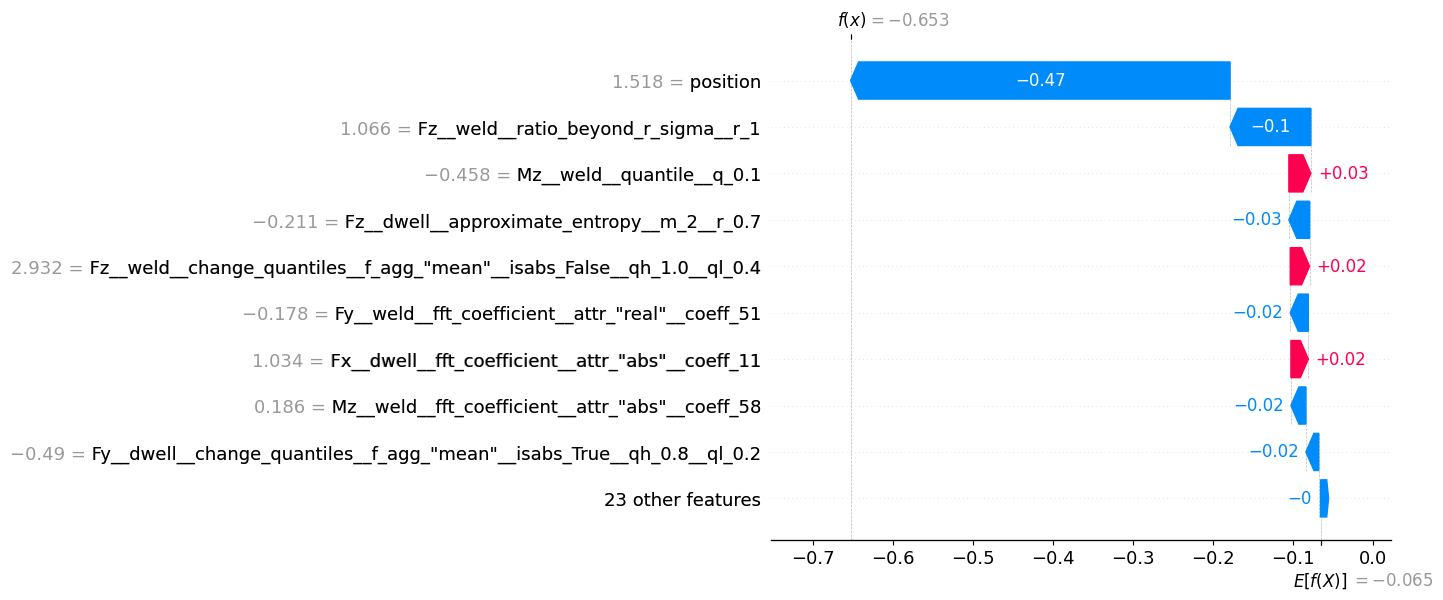

In [5]:
# Plot SHAP values for the first instance
shap.plots.waterfall(shap_values[0])

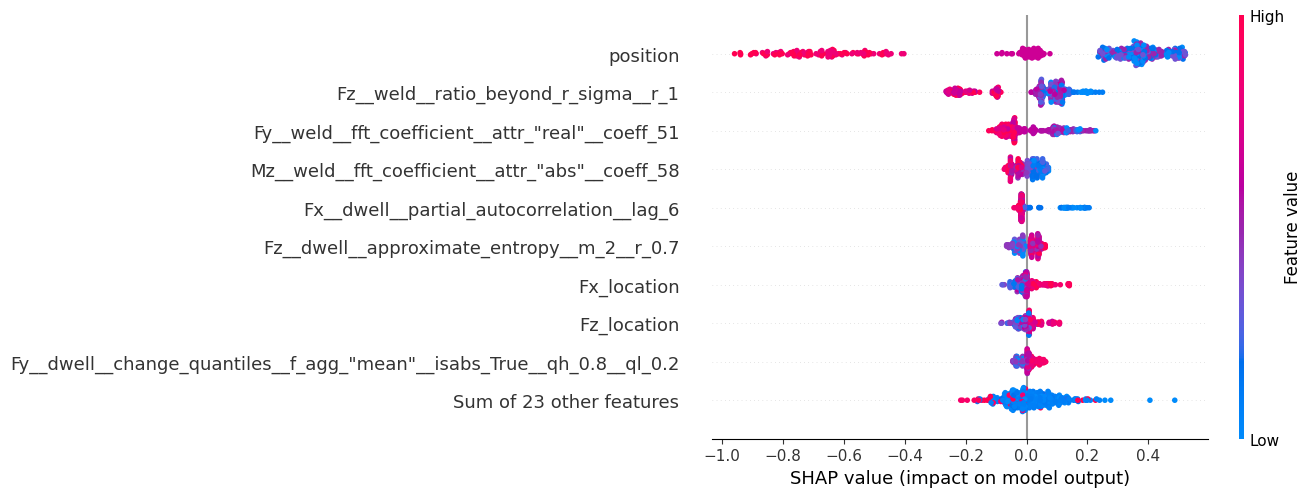

In [6]:
# Plot SHAP summary plot
shap.plots.beeswarm(shap_values)

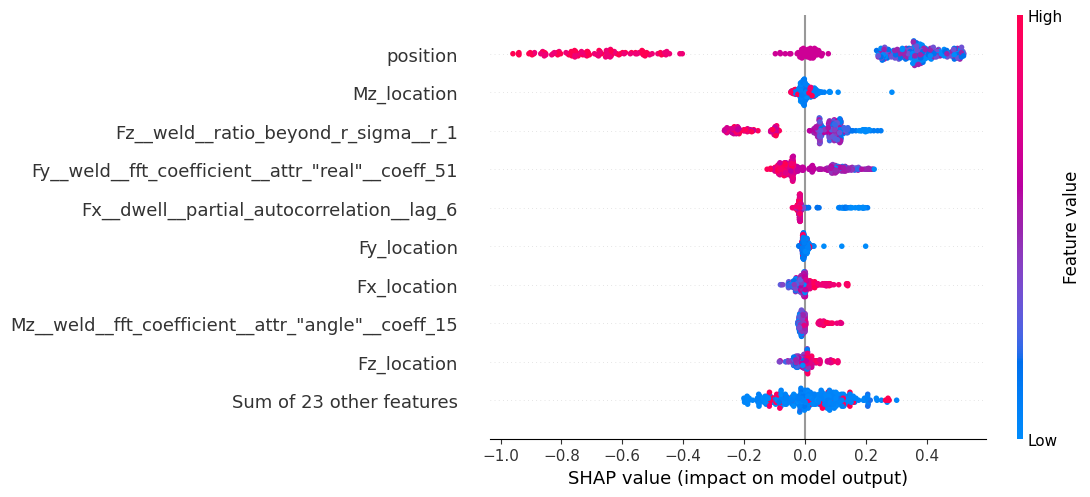

In [7]:
# Plot SHAP summary plot with features ordered by importance
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

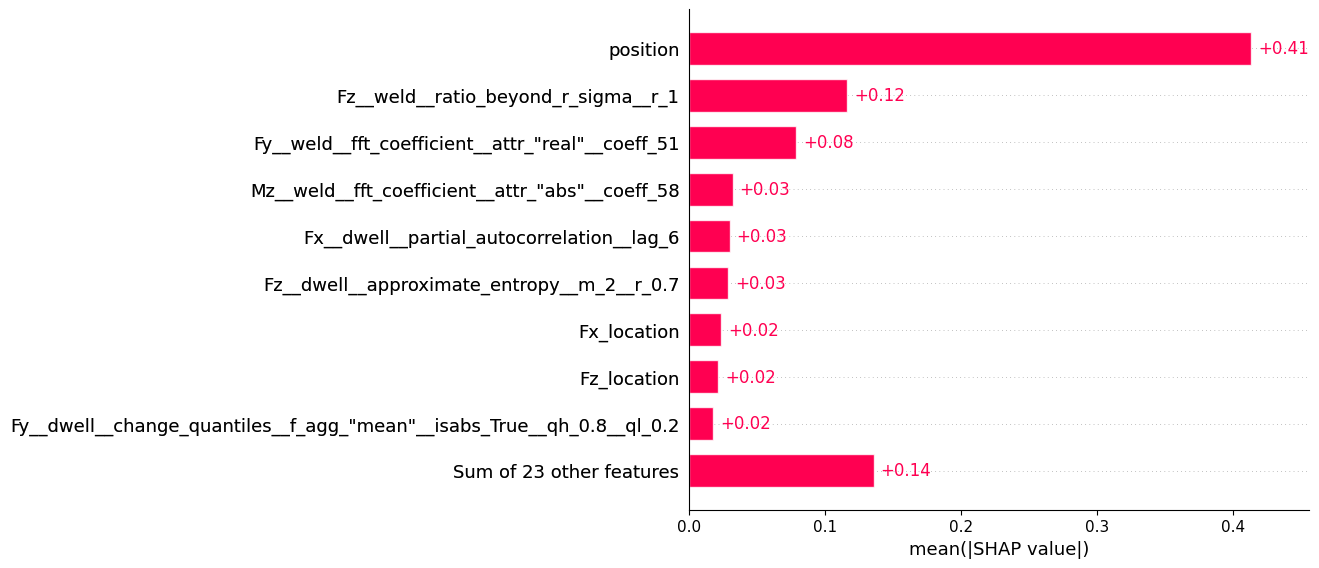

In [8]:
# Plot SHAP bar plot
shap.plots.bar(shap_values)

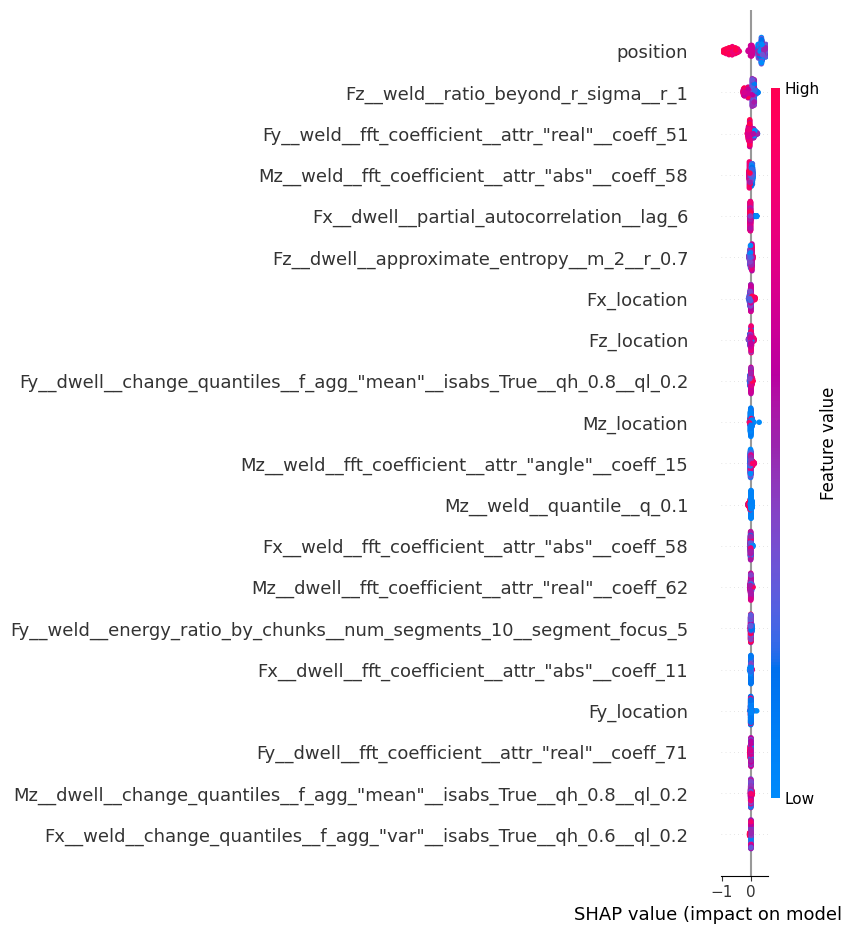

In [9]:
# Plot SHAP summary plot with feature names
shap.summary_plot(shap_values)

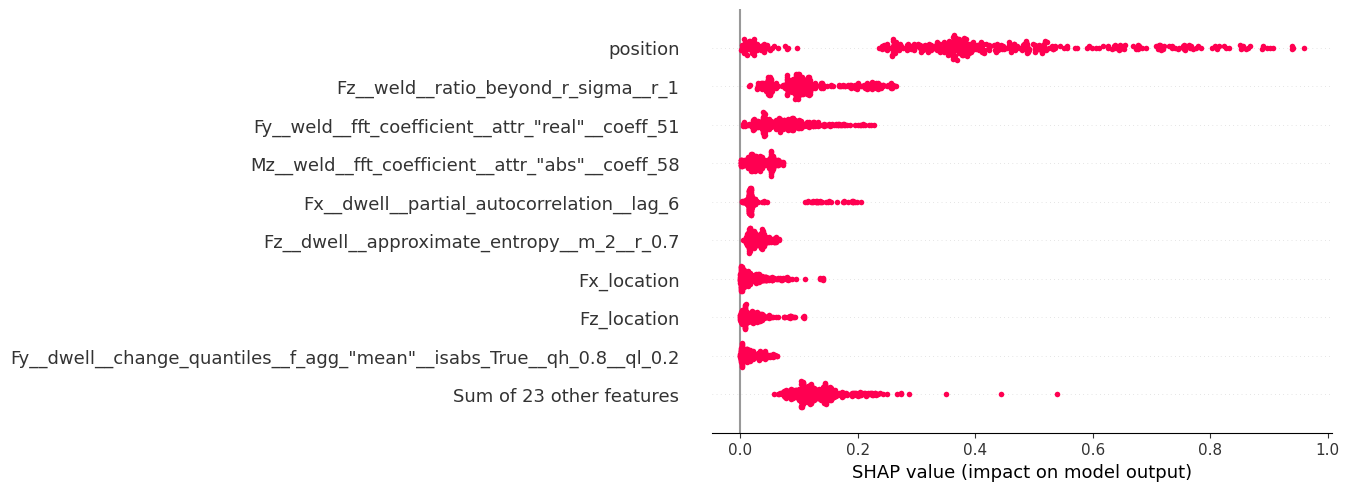

In [10]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

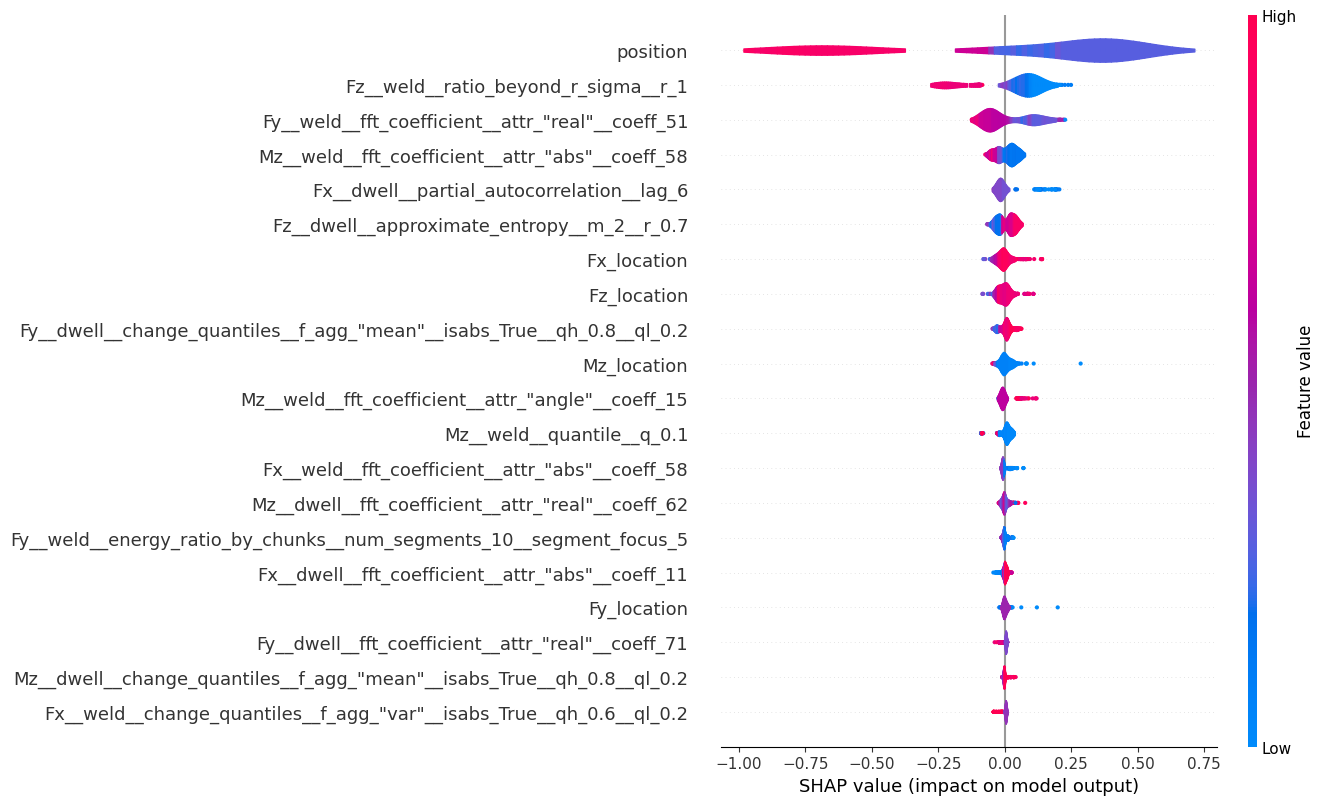

In [11]:
shap.plots.violin(shap_values)

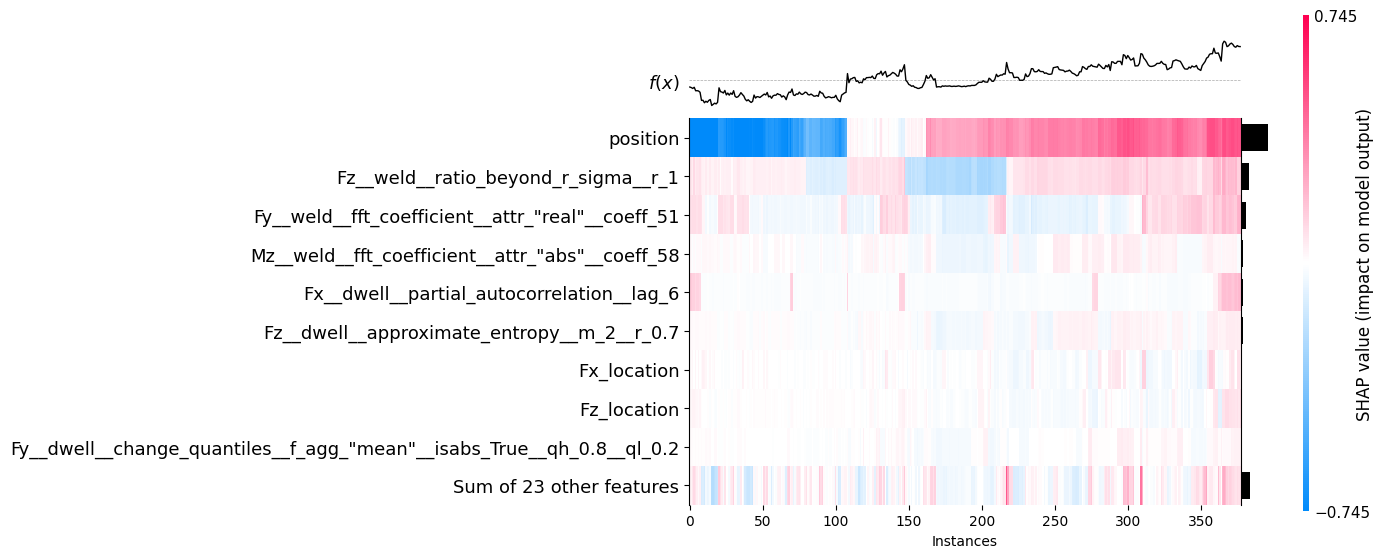

<Axes: xlabel='Instances'>

In [12]:
shap.plots.heatmap(shap_values)

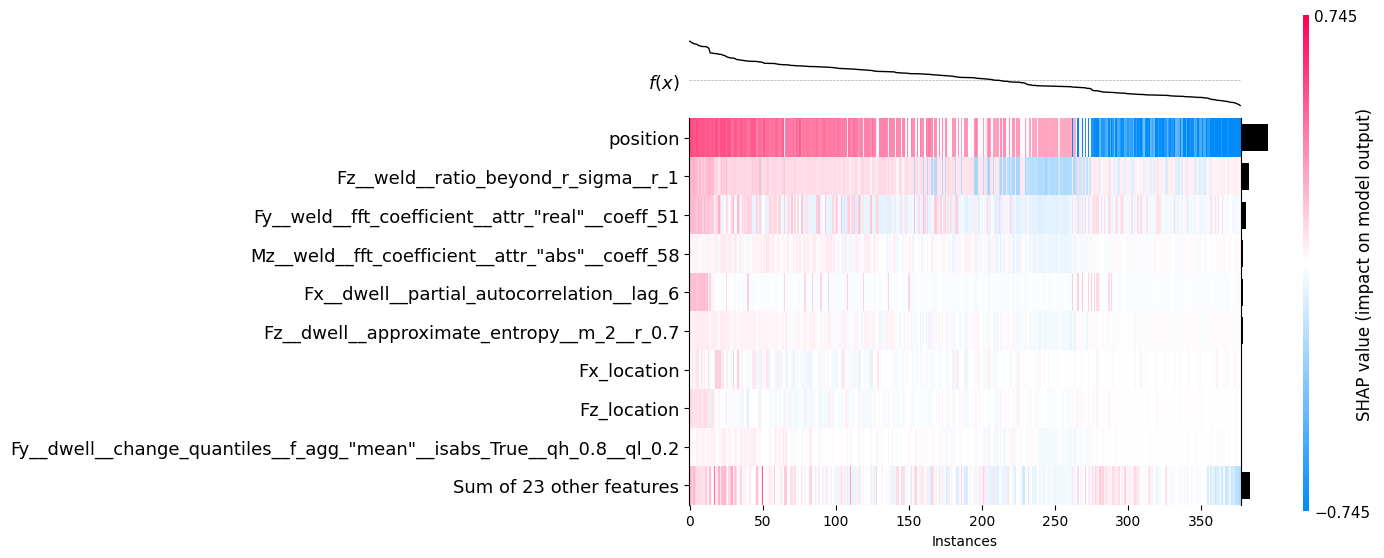

<Axes: xlabel='Instances'>

In [13]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))